# Laboratory 10: Numerical Advection Schemes #

Carmen Guo

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#Laboratory-10:-Numerical-Advection-Schemes" data-toc-modified-id="Laboratory-10:-Numerical-Advection-Schemes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Laboratory 10: Numerical Advection Schemes</a></span><ul class="toc-item"><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#List-of-Problems" data-toc-modified-id="List-of-Problems-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>List of Problems</a></span></li><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#Advection-Process" data-toc-modified-id="Advection-Process-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Advection Process</a></span></li><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#Simple-Solution-Using-Centred-Differencing-Scheme" data-toc-modified-id="Simple-Solution-Using-Centred-Differencing-Scheme-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simple Solution Using Centred Differencing Scheme</a></span></li><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#Numerical-Solution-Using-Upstream-Method" data-toc-modified-id="Numerical-Solution-Using-Upstream-Method-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Numerical Solution Using Upstream Method</a></span></li><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#A-Better-Solution" data-toc-modified-id="A-Better-Solution-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>A Better Solution</a></span><ul class="toc-item"><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#Problem-One" data-toc-modified-id="Problem-One-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Problem One</a></span></li></ul></li><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#Conclusion" data-toc-modified-id="Conclusion-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="http://localhost:8891/notebooks/lab10/01-lab_10.ipynb#References" data-toc-modified-id="References-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

## List of Problems ##

- [Problem One](#Problem-One)

In [1]:
from IPython.display import Image

## Advection Process##

The word advection means ‘transfer of heat through the horizontal motion
of a flow’. More generally, we will consider a flow of some
non-diffusive quantity. For example, consider the wind as a flow and the
water vapour in the air as the non-diffusive quantity. Suppose the wind
is travelling in the positive x direction, and we are considering the
vapour concentration from $x=1$ to $x=80$.

Assume that initially the distribution curve of the vapour is Gaussian
([Figure Initial Distribution](#fig:initial)). Ideally, the water droplets move at the
same speed as that of the air, so the distribution curve retains its
initial shape as it travels along the x-axis. This process is described
by the following PDE: 

<a name='eqn:advection'></a>
(Advection Eqn)
$$\frac{\partial c}{\partial t} + u \frac{\partial c}{\partial x} = 0$$ 
where $c$ is the concentration of the water
vapour, and $u$ is the speed of the wind (assuming the wind is blowing
at constant speed).

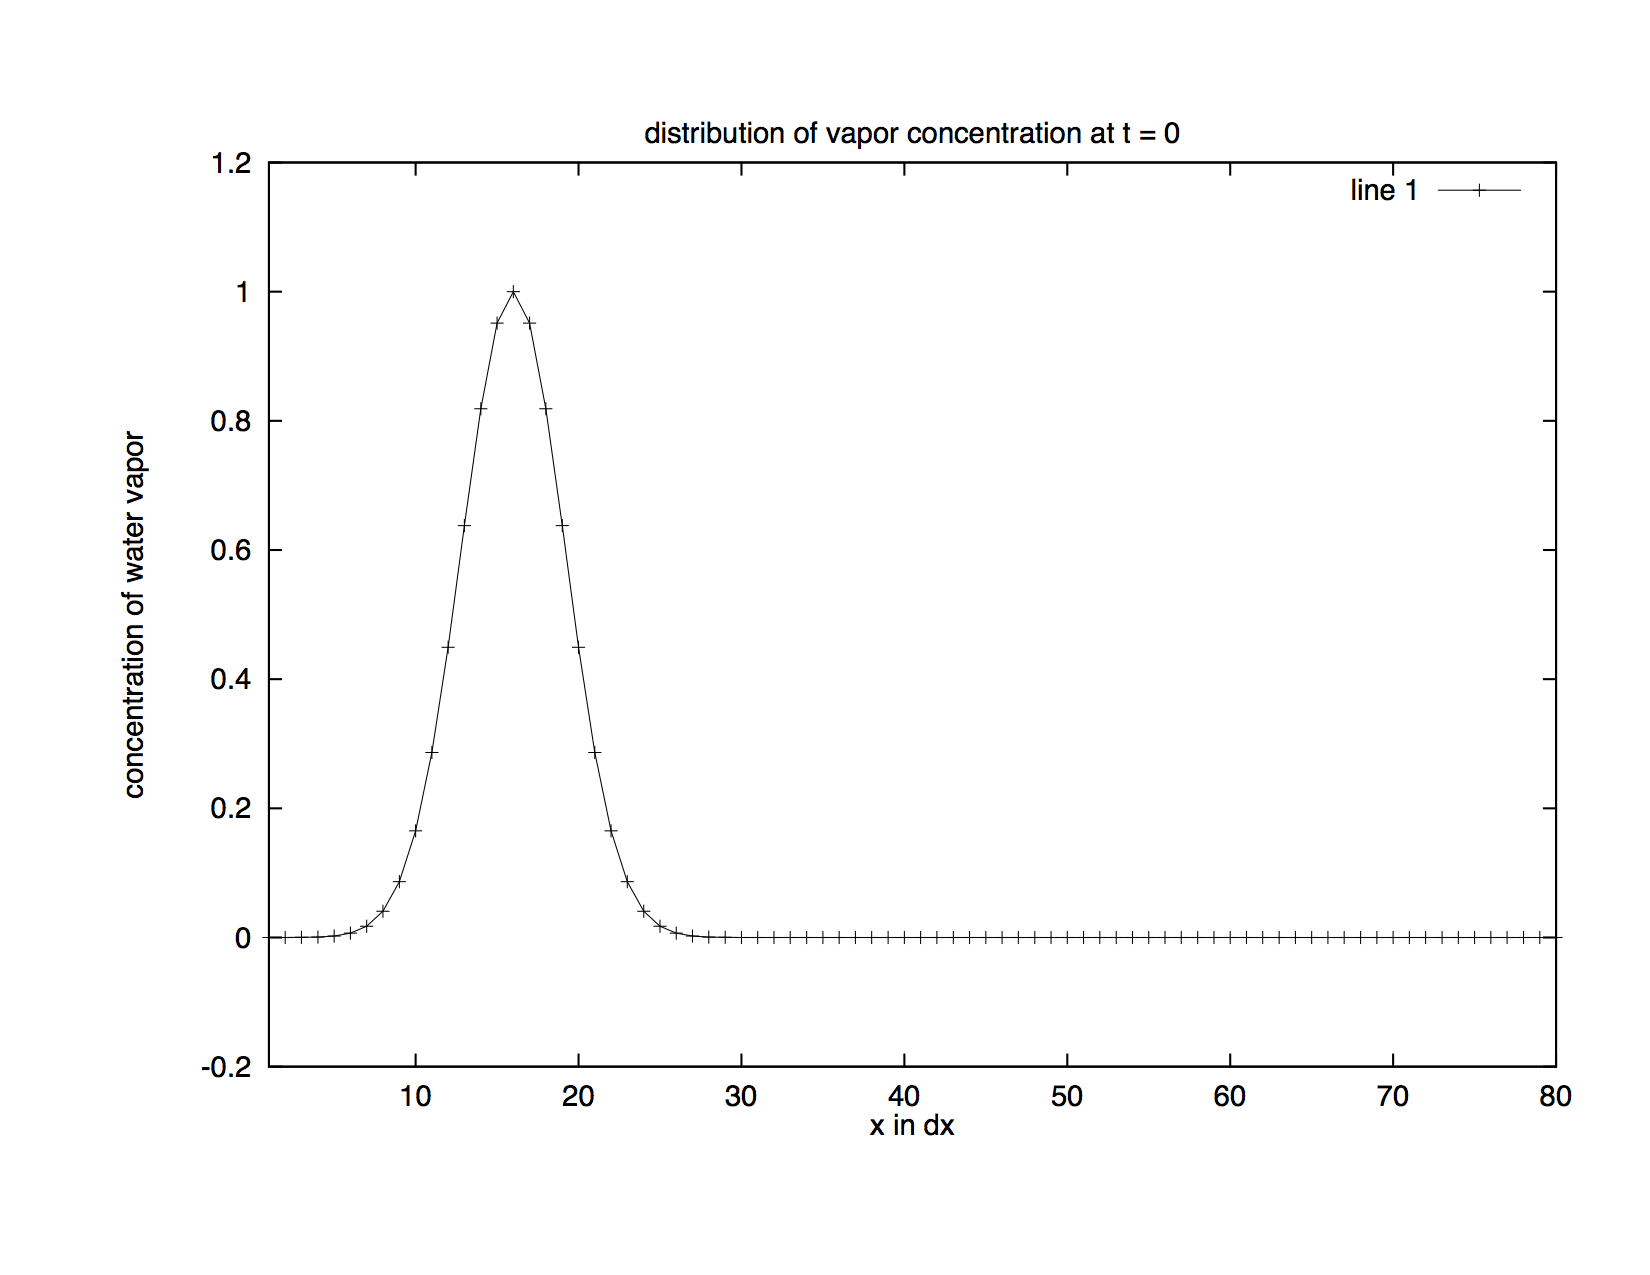

In [2]:
Image(filename='images/initial.png',width='60%') 

<a name='fig:initial'></a>
**Figure Initial Distribution:** This is the initial distribution of water vapour concentration.

As you will see in the upcoming examples, it is not easy to obtain a
satisfactory numerical solution to this PDE.

## Simple Solution Using Centred Differencing Scheme ##

Let’s start off simple and solve the PDE ([Advection Eqn](#eqn:advection)) using
centred differences, *i.e.*, by expanding the time and spatial derivatives
in the following way:

<a name='eqn:centered'></a>
(Centered Difference Scheme)
$$\frac{\partial c}{\partial t}(x=m dx, t=n dt) =\frac {c(x=m dx, t=(n+1) dt) - c(x=m dx, t=(n-1) dt)}{2 dt}$$
$$\frac{\partial c}{\partial x}(x=m dx, t=n dt)=\frac {c(x=(m+1) dx, t=n dt) - c(x=(m-1) dx, t=n dt)}{2 dx}$$

where $m=2, \ldots, 79$, and $n=2, \ldots$. Substitution of the
equations into the PDE yields the following recurrence relation:
$$c(m, n+1)= c(m, n-1) - u \frac{dt}{dx} (c(m+1, n) - c(m-1, n))$$

The boundary conditions are : $$c(x=1 dx)= c(x=79 dx)$$
$$c(x=80 dx)= c(x=2 dx)$$

The initial conditions are :
$$c(x=n dx) = \exp( - \alpha (n dx - \hbox{offset})^2)$$ where
$\hbox{offset}$ is the location of the peak of the distribution curve.
We don’t want the peak to be located near $x=0$ due to the boundary
conditions.

Now we need the values of $c$ at $t= 1 dt$ to calculate $c$ at
$t= 2 dt$, and we will use the Forward Euler scheme to approximate $c$
at $t= 1 dt$. So $$\frac{\partial c}{\partial t}(m, 0)= \frac {c(m, 1) - c(m, 0)}{dt}$$

Substitution of the equations into the PDE yields
$$c(m, 1) = c(m, 0) - u \frac{dt}{2 dx}(c(m+1, 0) - c(m-1, 0))$$ where
$m=2, \ldots, 79$. The end points at $t= 1 dt$ can be found using the
boundary conditions.

The function that computes the numerical solution using this scheme is in
*advection_funs.py*. It is a python function *advection(timesteps)*, which takes in
the number of time steps as input and plots the distribution curve at 20 time steps.

We can see the problem with this scheme just by running the function
with 10 time steps ([Figure Distribution with Centered Scheme](#fig:centered)). Following is a plot of
the distribution curve at the last time step.

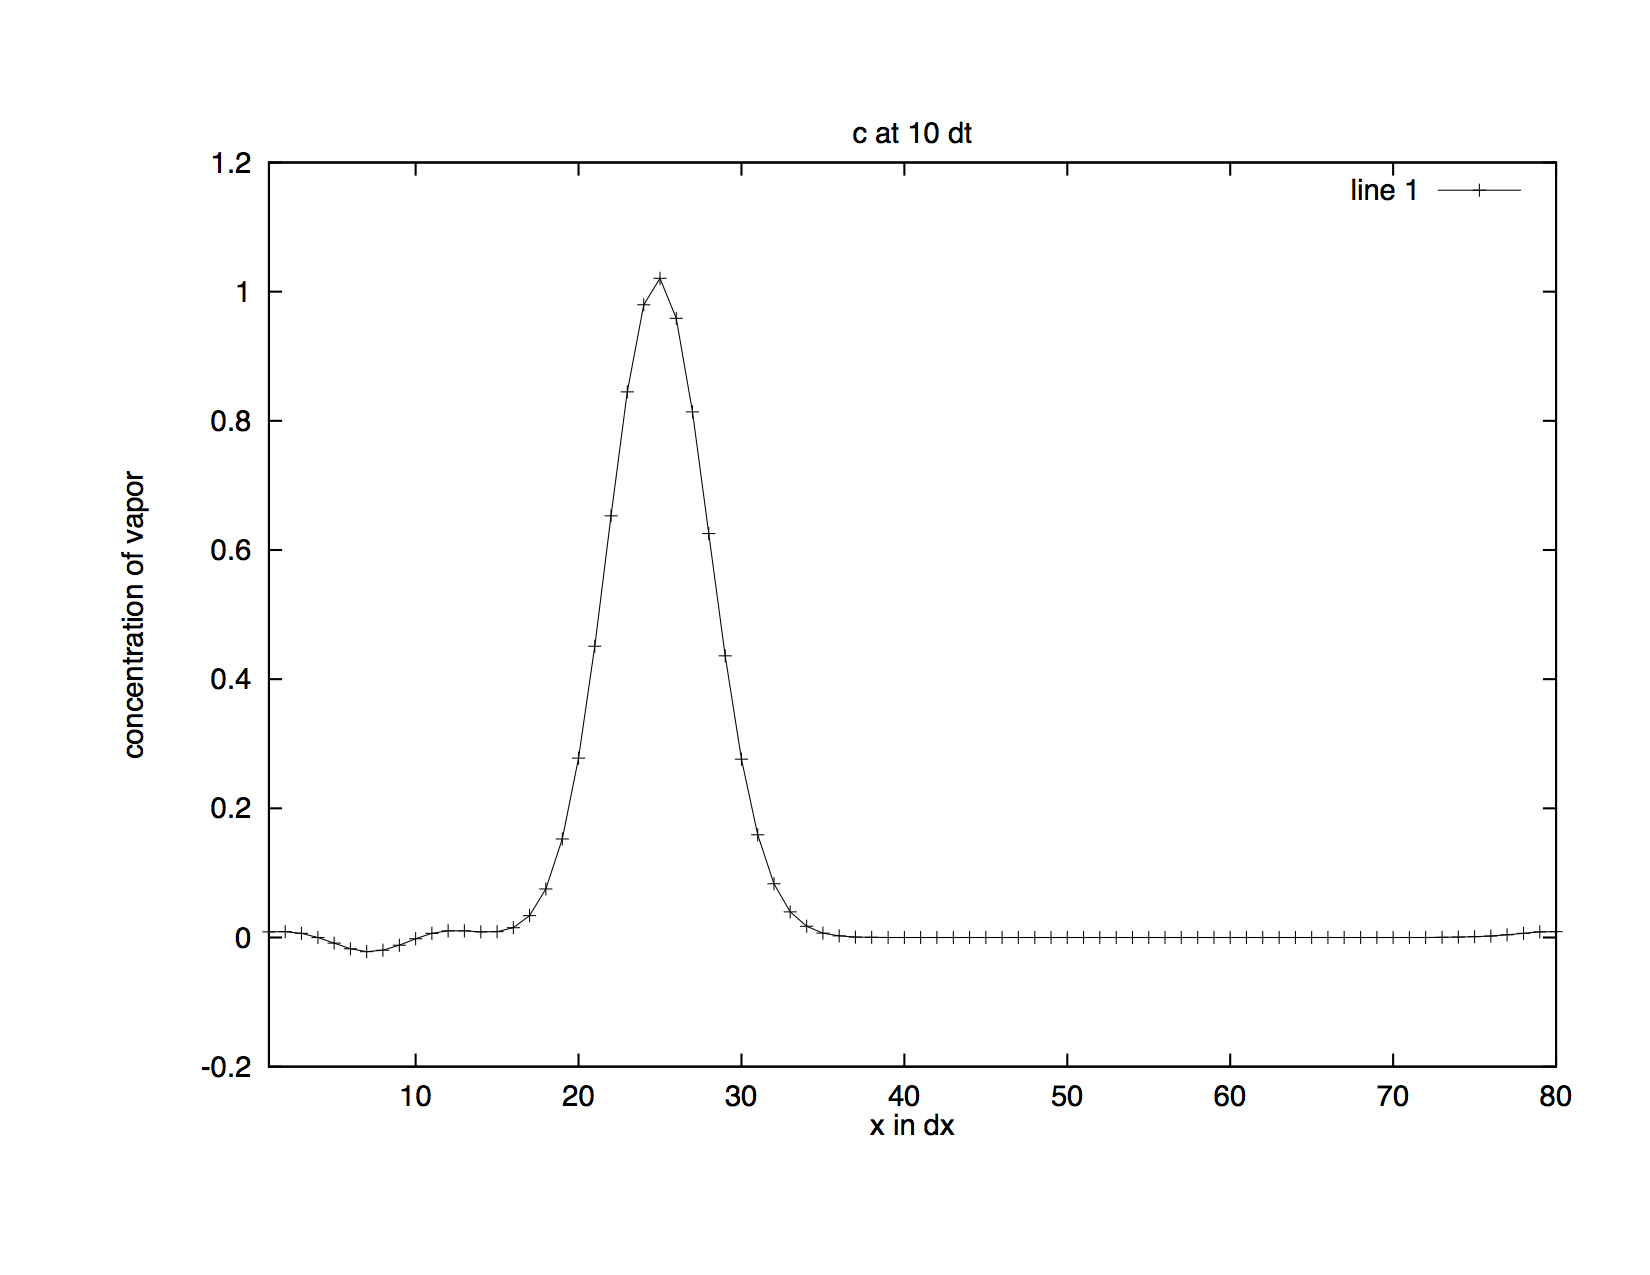

In [3]:
Image(filename='images/centered.png',width='60%') 

<a name='fig:centered'></a>
**Figure Distribution with Centered Scheme:** This is the distribution after 10 time steps approximated using the centred differencing scheme.

Comparing this curve with the initial state
([Figure Initial Distribution](#fig:initial)), we can see that ripples are produced to
the left of the curve which means negative values are generated. But
water vapour does not have negative concentrations. The centred
differencing scheme does not work well for the advection process because
it is not **positive definite**, *i.e.*, it generates negative values which
are impossible in real life.

## Numerical Solution Using Upstream Method ##


Let’s see what is wrong with our simple centred differencing scheme. We
used centred differences to compute the time and spatial derivatives
([Centered Difference Scheme](#eqn:centered)). In other words, $c(x=m dx)$ depends on
$c(x=(m-1) dx)$ and $c(x=(m+1) dx)$, and $c(t=n dt)$ depends on
$c(t=(n-1) dt)$ and $c(t=(n+1) dt)$. But we know the wind is moving in
the positive x direction, so $c(x=m dx)$ should not depend on
$c(x=(m+1) dx)$. Therefore, we will change the centred differencing
scheme to backward differencing scheme. In other words, we will always
be looking ‘upstream’ in the approximation.

If we use backward differences to approximate the spatial derivative but
continue to use centred differences to approximate the time derivative,
we will end up with an unstable scheme. Thus, we will use backward
differences for both time and spatial derivatives. Now the time and
spatial derivatives are given by:

<a name='eqn:upstream'></a>
(Upstream Scheme)
$$\frac{\partial c}{\partial t}(x=m dx, t=n dt)=\frac {c(x=m dx, t=n dt) - c(x=m dx, t=(n-1) dt)}{dt}$$
$$\frac{\partial c}{\partial x}(x=m dx, t=n dt)=\frac {c(x=m dx, t=n dt) - c(x=(m-1) dx, t=n dt)}{dx}$$

Substitution of the equations into the PDE yields
$$c(m, n+1)=c(m, n)- u \frac{dt}{dx} (c(m, n) - c(m-1, n))$$

The boundary conditions and the initial conditions are the same as in
the centred differencing scheme. This time we compute $c$ at $t= 1 dt$
using backward differences just as with all subsequent time steps.

The function that computes the solution using this scheme is in
*advection_funs.py*. It is a python function *advection2(timesteps)*, which takes
in the number of time steps as input and plots the distribution curve at 20 time steps.

Although this scheme is positive definite and conservative (the area
under the curve is the same as in the initial state), it introduces a
new problem — diffusion. As the time step increases, you can see that
the curve becomes wider and lower, *i.e.*, it diffuses quickly
([Figure Upstream Distribution](#fig:upstream)).

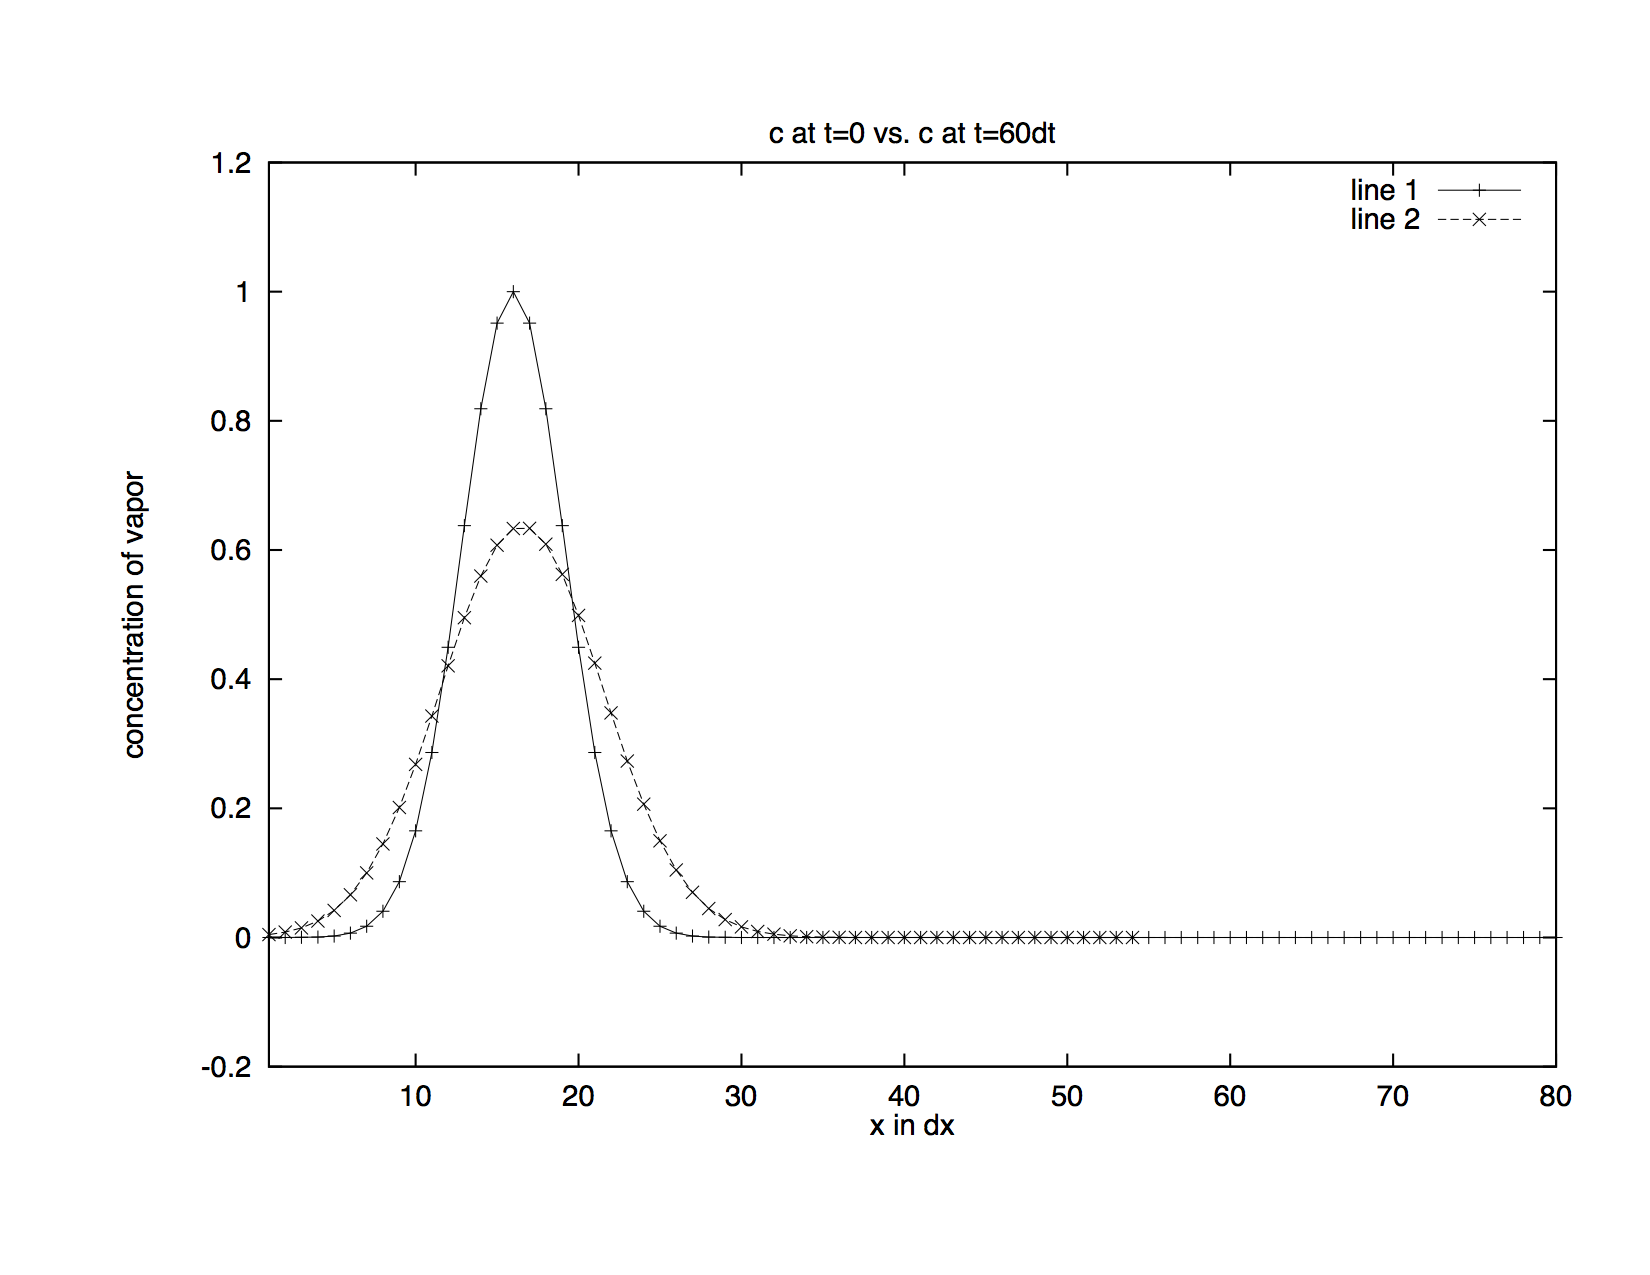

In [4]:
Image(filename='images/upstream.png',width='60%') 

<a name='fig:upstream'></a>
**Figure Upstream Distribution:**
This is the distribution after 60 time steps approximated using the
upstream method.

But ideally, the curve should retain its original shape as the wave
travels along the x-axis, so the upstream method is still not good
enough for the advection problem. In the next section, we will present
another method that does a better job.

## A Better Solution ##

In previous sections, we were concerned with values at grid points only,
ie, values of $c$ at $x= 1dx, 2dx, \ldots$. But in this section, we will
also consider grid boxes each containing a grid point in the centre. For
each grid point $j$, the left boundary of the grid box containing $j$ is
indexed as $j- 1/2$, and the right boundary as $j+ 1/2$. The scheme
presented here was developed by Andreas Bott ([Bott, 1989](#Ref:Bott)).

The PDE ([Advection Eqn](#eqn:advection)) is rewritten as :

<a name='eqn:FluxForm'></a>
(Flux Form Eqn)
$$\frac{\partial c}{\partial t} + \frac{\partial uc}{\partial x} = 0$$ 
where $F= uc$ gives the flux of water vapour.

Expand the time derivative using forward differences and the spatial
derivative as follows:
$$\frac{\partial F}{\partial x}(x=j dx)  = \frac {F(x= (j+1/2) dx) - F(x= (j-1/2) dx)}{dx}$$
where $F(x= j+1/2)$ gives the flux through the right boundary of the
grid box $j$. For simplicity, we use the notation $F(x= j+1/2)$ for
$F(x= j+1/2, n)$, ie, the flux through the right boundary of the grid
box j after $n$ time steps.

Substituting the expanded derivatives into the PDE, we obtain the
following recurrence formula ($c(m, n)= c(x= m dx, t= n dt)$):
$$c(m, n+1)= c(m, n) - \frac {dt} {dx}(F(m+1/2, n)-F(m-1/2, n))$$

Since flux is defined as the amount flowing through per unit time, we
need to calculate the portion of the distribution curve in each grid box
that passes the right boundary after $dt$

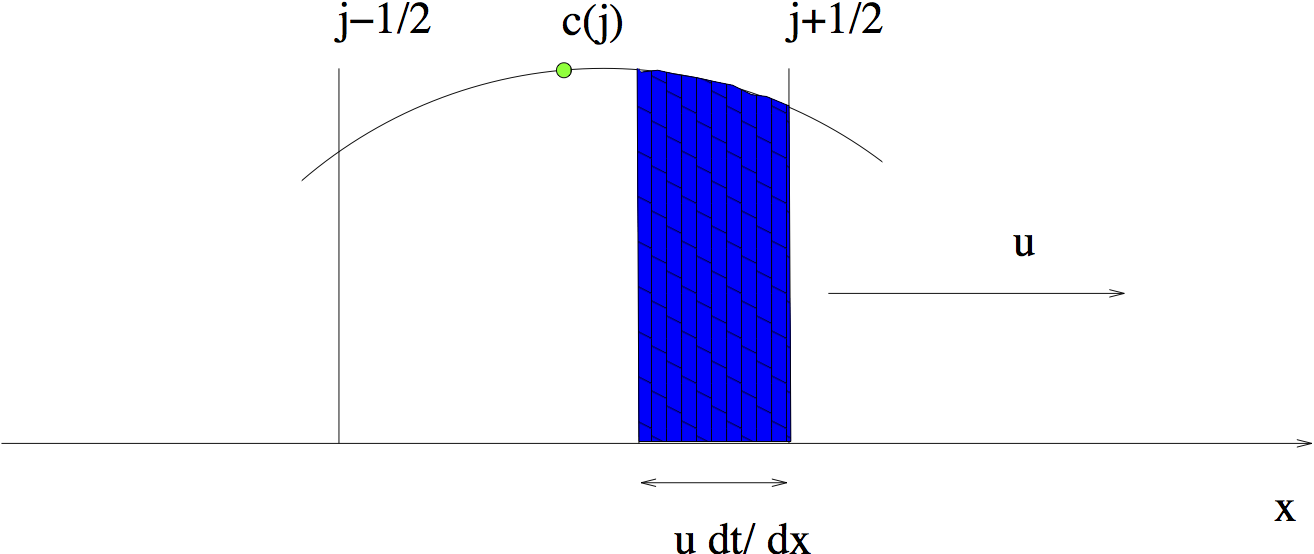

In [5]:
Image(filename='images/flux.png',width='60%') 

<a name='fig:flux'></a>
**Figure Amount Leaving Grid:**
After $dt$, the shaded area will be past the right boundary of the
grid box $j$.

As ([Figure Amount Leaving Grid](#fig:flux)) shows, the distribution curve in grid box $j$
has travelled a distance of ${u dt}$ after each time step; in other
words, the curve has moved $u dt/dx$ of a grid space within a time unit.
The shaded region is the portion of the vapour that passes the right
boundary of grid box $j$ within $dt$. We can use integration to find out
the area of the shaded region and then divide the result by $dt$ to get
$F(j+1/2)$.

Since we only know $c$ at the grid point $j$, we are going to use
polynomial interpolation techniques to approximate $c$ at other points
in the grid box. We define $c$ in grid box $j$ with a polynomial of
order $l$ as follows:

$$c _{j, \ell}(x^\prime) = \sum _{k=0} ^{\ell} a _{j, k} x ^{\prime k}$$ where
$x^\prime = (x- x_j)/dx$ and $-1/2 \le x^\prime \le \ell/2$. 

The
coefficients $a _{j, k}$ are obtained by interpolating the curve with
the aid of neighbouring grid points. We will skip the detail of the
interpolation process. Values of $a _{j, k}$ for $\ell=0, 1, \ldots, 4$
have been computed and are summarised in Tables
[Table $\ell=0$](#tab:ell0), [Table $\ell=1$](#tab:ell1), [Table $\ell=2$](#tab:ell2), [Table $\ell=3$](#tab:ell3) and
[Table $\ell=4$](#tab:ell4),

<a name='tab:ell0'></a>
**Table $\ell = 0$:**

|.............|................|
| :-------------: | :-----------------: |
| $k=0$     | $a_{j,0}=c_j$ |

<a name='tab:ell1'></a>
**Table $\ell = 1$:** two representations

|.............|............................|
| :-------------: | :-----------------: |
| $k=0$           |  $a_{j,0}= c_j$ |
| $k=1$           |  $a_{j, 1}= c_{j+1} - c_j$ |

|.............|............................|
| :-------------: | :-----------------: |
|  $k=0$          |  $a_{j,0}= c_j$ |
|  $k=1$          |  $a_{j, 1}= c_j-c_{j-1}$ |
  

<a name='tab:ell2'></a>
**Table $\ell = 2$:**

|.............|.................................................|
| :-------------: | :-----------------: |
|  $k=0$          |  $a_{j,0}= c_j$ |
| $k=1$          | $a_{j, 1}=\frac {1}{2}(c_{j+1}-c_{j-1})$ |
|  $k=2$         |  $a_{j, 2}=\frac {1}{2}(c_{j+1}-2c_j+c_{j-1})$ |

<a name='tab:ell3'></a>
**Table $\ell = 3$:** two representations

|.............|....................................................................|
| :-------------: | :-----------------: |
|  $k=0$          |  $a_{j,0}= c_j$ |
|   $k=1$          | $a_{j, 1}=\frac {1}{6}(-c_{j+2}+6c_{j+1}-3c_j-2c_{j-1})$ |
|    $k=2$          | $a_{j, 2}=\frac {1}{2}(c_{j+1}-2c_j+c_{j-1})$ |
|    $k=3$          | $a_{j, 3}=\frac {1}{6}(c_{j+2}-3c_{j+1}+3c_j-c_{j-1})$ |

|.............|....................................................................|
| :-------------: | :-----------------: |
|  $k=0$          |  $a_{j,0}= c_j$ |
|  $k=1$        |  $a_{j, 1}=\frac {1}{6}(2c_{j+1}+3c_j-6{j-1}+c_{j-2})$ |
|   $k=2$        |  $a_{j, 2}=\frac {1}{2}(c_{j+1}-2c_j+c_{j-1})$ |
|   $k=3$        |  $a_{j, 3}=\frac {1}{6}(c_{j+1}-3c_j+3c_{j-1}-c_{j-2})$ |

<a name='tab:ell4'></a>
**Table $\ell = 4$:**

|.............|........................................................................................|
| :-------------: | :-----------------: |
|  $k=0$          |  $a_{j,0}= c_j$ |
|   $k=1$        |  $a_{j, 1}=\frac {1}{12}(-c_{j+2}+8c_{j+1}-8c_{j-1}+c_{j-2})$ |
|   $k=2$        |  $a_{j, 2}=\frac {1}{24}(-c_{j+2}+16c_{j+1}-30c_j+16c_{j-1}-c_{j-2})$ |
 |  $k=3$        |  $a_{j, 3}=\frac {1}{12}(c_{j+2}-2c_{j+1}+2c_{j-1}-c_{j-2})$ |
  | $k=4$        |  $a_{j, 4}=\frac {1}{24}(c_{j+2}-4c_{j+1}+6c_j-4c_{j-1}+c_{j-2})$ |

Note that for even order polynomials, an odd number of $c$ values
including the grid point $j$ are needed to calculate the coefficients
$a_{j, k}$. This means the same number of grid points to the left and
right of $x_j$ are used in the calculation of $a_{j, k}$. If on the
other hand, we choose odd order polynomials, there will be one extra
point used to either side of $x_j$, thus resulting in 2 different
representations of $a_{j, k}$. This is why there are 2 sets of
$a_{j, k}$ for $\ell=1, 3$ in the table. Decision as to which set is to be
used must be made according to specific conditions of the calculation.

If we choose $\ell=0$, we will end up with the upstream method. In other
words, the upstream method assumes that $c$ is constant in each grid
box. This poor representation of $c$ results in strong numerical
diffusion. Experiments have shown that generally if we use higher order
polynomials (where $\ell \le 4$), we can significantly suppress numerical
diffusion.

Now we define $I_{j+1/2}$ as the shaded area in grid box $j$ in ([Figure Amount Leaving Grid](#fig:flux)): 

<a name='eq:area'></a>
(Flux Leaving Eqn)
$$
 I_{j+1/2} = \int _{1/2 - \frac{udt}{dx}}^{1/2} c_j(x^\prime) dx^\prime $$
   $$ =  \sum _{k=0}^{l} \frac {a_{j, k}}{(k+1) 2^{k+1}} \left[1- \left(1- 2 u \frac{dt}{dx}\right)^{k+1} \right] $$

Note that we are integrating over $x^\prime$ instead of $x$. Thus, to
get the real shaded area, we need to multiply $I_{j+1/2}$ by $dx$. So

<a name='eq:flux2'></a>
(Flux Eqn)
$$F_{j+1/2}= \frac {dx} {dt}I_{j+1/2}
$$ In this form, the scheme is conservative and
weakly diffusive. But it still lacks positive definiteness. A sufficient
condition for this is 

<a name='eq:posdef'></a>
(Positive Definite Condition)
$$0 \le  I_{j+1/2} dx  \le  c_j dx
$$ That is, the total outflow is never
negative and never greater than $c_j dx$. In other words, the shaded
area should be no less than zero but no greater than the area of the
rectangle with length $c_j$ and width $dx$. 
([Figure Total in Cell](#fig:limit))
shows why the total outflow should be limited above by $c_j dx$:

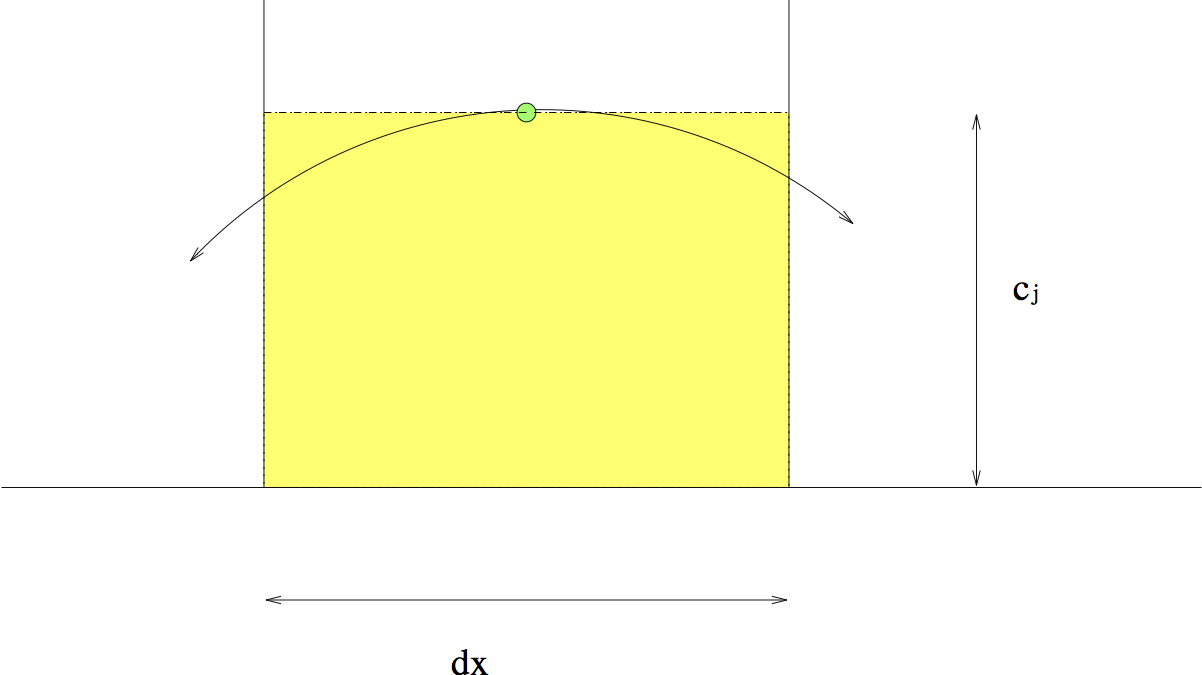

In [6]:
Image(filename='images/limit.png',width='60%') 

<a name='fig:limit'></a>
**Figure Total in Cell:** The shaded area is equal to $c_j dx$, and it is already greater than
the total amount of vapour (the area under the curve) in grid box $j$.
If $I_{j+1/2} dx > c_j dx$, then the total outflow $I_{j+1/2} dx$ would
be greater than the amount of vapour in the grid box, and the amount of
vapour will be negative at the next time step, thus violating the
positive definiteness requirement. 

If the total outflow is larger than the shaded area $c_j dx$, we will
get negative values of $c$ in this grid box at the next time step. We do
not want this to happen since negative values are meaningless.

To satisfy the condition for positive definiteness
([Positive Definite Condition](#eq:posdef)) we need to guarantee that
$I_{j+1/2} \le c_j$ holds at all time steps. We can achieve this
condition by multiplying $I_{j+1/2}$ by a weighting factor. Define
$I_{j+1/2}^\prime$ as 

<a name='eq:normalize'></a>
(Normalization Eqn)
$$I_{j+1/2}^\prime=I_{j+1/2} \frac {c_j}{I_j}$$ where 

$$
 {I_j} = \int_{-1/2}^{1/2} c_j(x^\prime) dx^\prime $$
$$ = \sum_{k=0}^{l} \frac {a_{j, k}} {(k+1) 2^{k+1}} [(-1)^k +1]$$

Since the total flow out of a grid box is always less than the total
grid volume, $I_{j+1/2}/I_j$ is always less than 1, thus
$I_{j+1/2} c_j/I_j$ is always less than $c_j$. Thus we can satisfy the
upper limit of the positive definiteness condition
([Positive Definite Condition](#eq:posdef)) by multiplying $I_{j+1/2}$ by a weighting
factor $c_j/I_j$. So now $F$ is defined as:
$$F_{j+1/2}= \frac {dx} {dt}\frac {c_j}{I_j} I_{j+1/2}$$

Now to satisfy the lower limit of the positive definiteness condition,
([Positive Definite Condition](#eq:posdef))
we need to make sure $I_{j+1/2}$ remains non negative at all time steps.
So we will set $I_{j+1/2}$ to 0 whenever it is negative.

If we are looking at the parts of the curve that are far away from the
peak, $I_j=0, I_{j+1/2}=0$, and we will be dividing by 0 in ([Normalization Eqn](#eq:normalize))! To avoid this instability, we introduce a small
term $\epsilon$ when $I_j=0, I_{j+1/2}=0$, *i.e.*, we set $I_j$ to
$\epsilon$.

Combining all the conditions from above, the advection scheme is
described as follows:
$$c(j, n+1)= c(j, n) - \frac {dt} {dx} [F(j+1/2, n)- F(j-1/2, n)]$$
$$F(j+1/2, n)= \frac {dx}{dt} \frac {i_{l, j+1/2}}{i_{l, j}} c_j$$ with
$$i_{l, j+1/2} = \hbox{max}(0, I_{j+1/2})$$
$$i_{l, j} = \hbox{max}(I_{l, j}, i_{l, j+1/2} + \epsilon)$$ where $l$
is the order of the polynomial we use to interpolate $c$ in each grid
box.

An example function for this scheme is in *advection_funs.py*. The python
function *advection3(timesteps, order)* takes in 2 arguments, the first is
the number of time steps to be computed, the second is the order of the
polynomial for the approximation of $c$ within each grid box. It plots the curve at 20 time steps.
Students should try it out and compare this scheme with the previous
two.

### Problem One ###

Using the scheme presented in this section, modify *advection3.py* to
solve the following advection problem: The wind is moving along the
x-axis with speed $u=20 \hbox{ m/s}$. The initial distribution curve is
$290 \hbox{ km}$ in width. Use your program to approximate the curve
during 24 hours.

a\) Run your program for different orders of approximating polynomials
(up to 4). Compare the accuracy of approximation for different orders.
Do you see better results with increasing order? Is this true for all
orders from 0 to 4? Is there any particularity to odd and even order
polynomials?

b\) For odd ordered polynomials, *advection3.py* uses the representation
of $a_{j,k}$ that involves an extra point to the right of the centre
grid point. Modify the table of coefficients for odd ordered polynomials
([Table $\ell=1$](#tab:ell1))and ([Table $\ell=3$](#tab:ell3)) to use the extra point to the left of the
centre grid point. Run your program again and compare the results of 2
different representations of $a_{j,k}$ for order 1 and 3, respectively.
Is one representation better than the other, or about the same, or does
each have its own problem? How, do you think the different
representation affects the result?

/Users/jasonkindrachuk/eosc511/numeric/numlabs/lab10/Tables/l0_table.txt
/Users/jasonkindrachuk/eosc511/numeric/numlabs/lab10/Tables/l1_table.txt
/Users/jasonkindrachuk/eosc511/numeric/numlabs/lab10/Tables/l2_table.txt
/Users/jasonkindrachuk/eosc511/numeric/numlabs/lab10/Tables/l3_table.txt
/Users/jasonkindrachuk/eosc511/numeric/numlabs/lab10/Tables/l4_table.txt


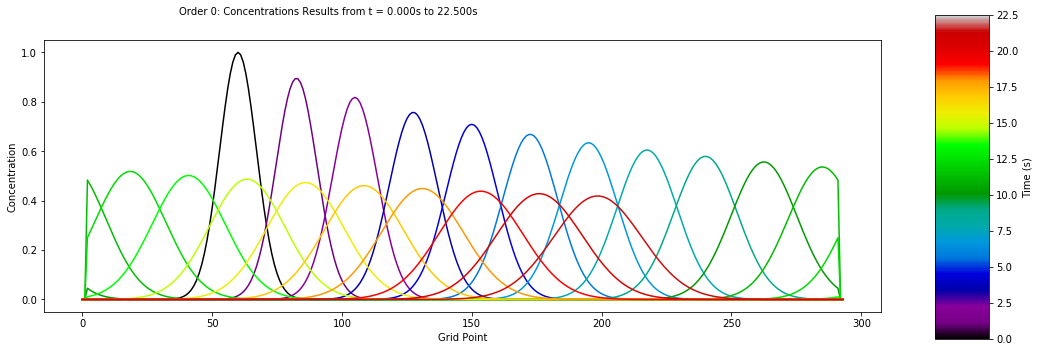

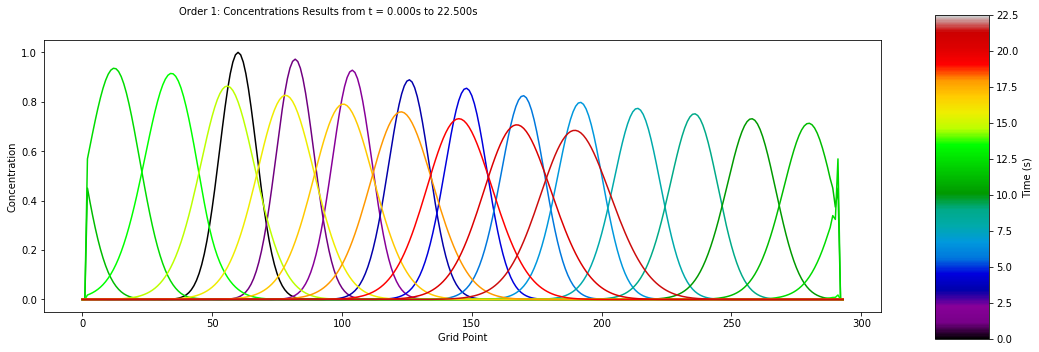

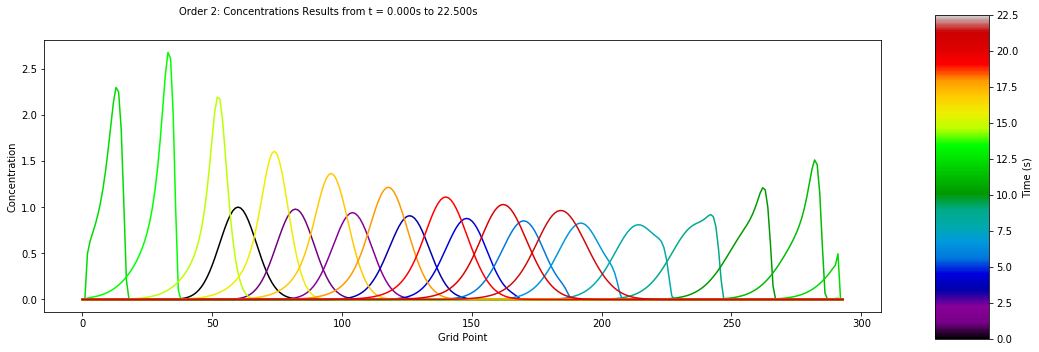

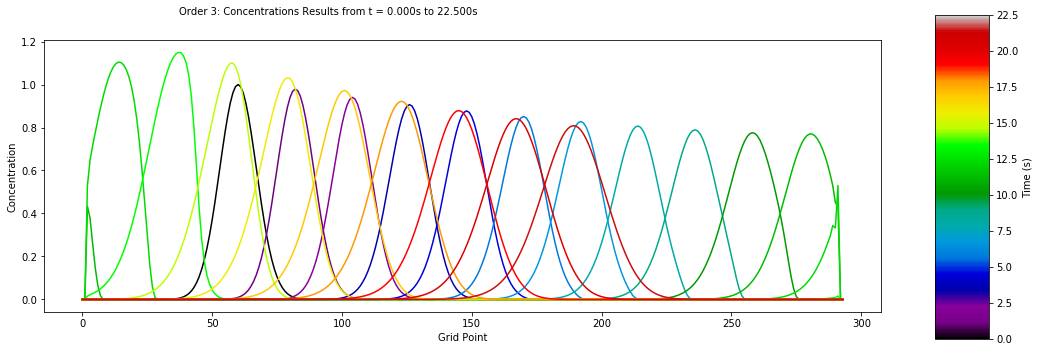

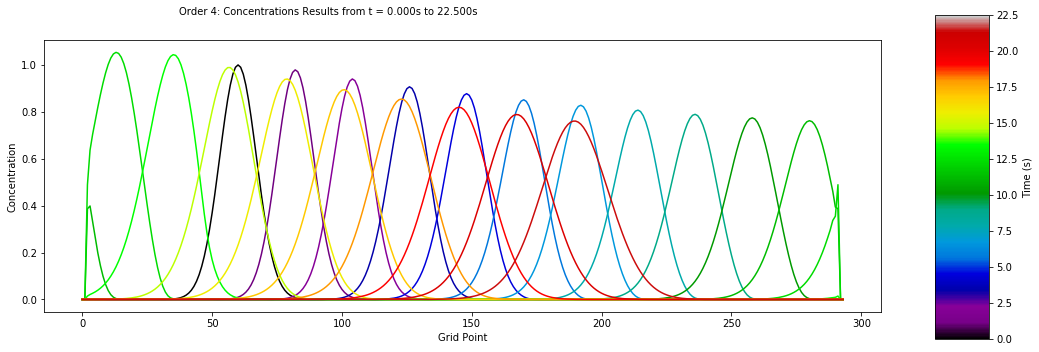

In [1]:
import os
from IPython.display import Image
import IPython.display as display
# import plotting package and numerical python package for use in examples later
import matplotlib.pyplot as plt
# make the plots happen inline
% matplotlib inline  
# import the numpy array handling library
import numpy as np
from numlabs.lab10 import advection_funsjk as ad
import importlib
importlib.reload(ad)

time = 1000

#ad.advection(time)
#ad.advection2(time)

ad.advection3(time,0)
importlib.reload(ad)

ad.advection3(time,1)

importlib.reload(ad)
ad.advection3(time,2)

importlib.reload(ad)
ad.advection3(time,3)

importlib.reload(ad)
ad.advection3(time,4)



Crashes when I try to run 24 hours (or anywhere above a few seconds) -- modified the code to increase dx, didn't help. Couldn't see the trends in orders 1 and 3 because of this. 

I understand that to proceed I would need to modify the tables to match the second set of values for l = 1 and l = 3 above, but considering i can't get it to plot, doesn't seem to be much point.

## Conclusion ##

The last scheme presented solves 2 problems introduced in the previous
two schemes. The centred differencing scheme lacks positive definiteness
because it is of second order accuracy, thus it introduces additional
oscillations near the peak. The scheme presented here solves this
problem by checking and normalising the relevant values (ie, $I_{j+1/2}$
and $I_j$) when needed at each time step. The upstream scheme produces
strong diffusion because it is of only first order accuracy. The scheme
presented here solves this problem by using higher order polynomials to
approximate $c$ at each grid box.

Experiments have shown that this scheme is numerically stable in most
atmospheric situations. This scheme is only slightly unstable in the
case of strong deformational flow field models.

For more detail about this advection scheme , please refer to ([Bott, 1989](#Ref:Bott)).
Since 1989, new advection schemes including the MUSCL and TVD have been developed and are more routinely used. 

## References ##

<a name='Ref:Bott'></a>
Bott, A., 1989: A positive definite advection scheme obtained by nonlinear renormalization of the advective fluxes. *Monthly Weather Review*, 117, 1006–1015.